# Topic Modelling

## Dependencies

In [5]:
!pip install top2vec
!pip install --upgrade joblib==1.1.0
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.0 MB/s 
     |████████████████████████████████| 7.6 MB 45.1 MB/s 
     |████████████████████████████████| 163 kB 45.5 MB/s 


## Mount files from Google Drive directory

In [2]:
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/IT1244 Project'
    # move to Google Drive directory
    os.chdir(path_to_file)

Mounted at /content/gdrive


## Load Data

In [17]:
import pandas as pd
df_train = pd.read_csv('dataset/train_data.csv')
positive = df_train[df_train["sentiment"] == 1][["review"]]
negative = df_train[df_train["sentiment"] == 0][["review"]]

## Instantiate Question-Answering Model

In [18]:
from tqdm.auto import tqdm
import pandas as pd
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
tqdm.pandas()

model_name = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
nlp = pipeline("question-answering", model=model, tokenizer=tokenizer)


def get_answer(row: pd.Series, nlp: pipeline, sentiment: str) -> str:
    # Getting answers
    questions = {"positive": "What was the best aspect of this movie?", "negative": "What was the worst aspect of this movie?"}
    question = questions[sentiment]
    QA_input = {
        "question": question,
        "context": row.review,
    }  # QA pipeline expects the input in this format
    sentiment = nlp(QA_input)
    # print(sentiment)
    return sentiment["answer"], sentiment["score"]

## Apply Question-Answering to Positive Reviews

In [20]:
positive[["answer", "score"]] = positive.progress_apply(lambda row: get_answer(row, nlp, "positive"), axis=1, result_type="expand")

  0%|          | 0/12500 [00:00<?, ?it/s]

In [21]:
positive.head(25)

,review,answer,score
0,Bromwell High is a cartoon comedy. It ran at t...,The scramble to survive financially,0.205585
1,Homelessness (or Houselessness as George Carli...,inspire you to help others,0.029490
2,Brilliant over-acting by Lesley Ann Warren. Be...,Brilliant over-acting,0.024109
3,This is easily the most underrated film inn th...,this film is very lovable,0.038552
4,This is not the typical Mel Brooks film. It wa...,The acting was good overall,0.156915
5,"This isn't the comedic Robin Williams, nor is ...",I was highly entertained,0.222474
6,Yes its an art... to successfully make a slow ...,The direction is good,0.070473
7,"In this ""critically acclaimed psychological th...","Collette's ""Donna"" belongs in the creepy hall ...",0.135883
8,THE NIGHT LISTENER (2006) **1/2 Robin Williams...,be careful of what you hope for.,0.136657
9,"You know, Robin Williams, God bless him, is co...",dark,0.399019


In [22]:
positive.to_csv("results/positive_answers.csv")

## Apply Question-Answering to Negative Reviews

In [51]:
negative[["answer", "score"]] = negative.progress_apply(lambda row: get_answer(row, nlp, "negative"), axis=1, result_type="expand")

  0%|          | 0/5579 [00:00<?, ?it/s]

In [52]:
negative.head(25)

,Unnamed: 0,review,answer,score
1,12501,Airport '77 starts as a brand new luxury 747 p...,action scenes,0.120679
2,12502,This film lacked something I couldn't put my f...,charisma on the part of the leading actress,0.424350
3,12503,"Sorry everyone,,, I know this is supposed to b...",The absence of a sound track was brutal,0.131782
4,12504,When I was little my parents took me along to ...,self indulgent and spiritually draining,0.374741
8,12508,This film is mediocre at best. Angie Harmon is...,mediocre,0.128231
9,12509,The film is bad. There is no other way to say ...,The story is weak and outdated,0.246134
15,12515,A worn-out plot of a man who takes the rap for...,homosexuality theme,0.104174
20,12520,The characters are unlikeable and the script i...,the script is awful,0.189569
21,12521,Kareena Kapoor in a bikini hmmmmmmmm.<br /><br...,criticism the first half of the movie isn't th...,0.227112
23,12523,Vijay Krishna Acharya's 'Tashan' is a over-hyp...,failure at the box office,0.527806


In [53]:
negative.to_csv("results/negative_answers.csv")

## Pre-processing, Embedding, Dimensionality Reduction, Clustering, and Topic Representations of Positive Reviews

In [23]:
positive = pd.read_csv("results/positive_answers.csv")
positive.drop(positive[positive.score < 0.1].index, inplace=True)
positive.shape[0]

7226

In [24]:
from top2vec import Top2Vec
positive_model = Top2Vec(documents=positive.answer.to_list(),
                min_count=100,
                speed="deep-learn",
                ngram_vocab=True,
                workers=12)

2022-10-29 12:35:24,236 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-10-29 12:35:24,387 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-10-29 12:39:12,903 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-10-29 12:39:57,490 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-10-29 12:39:57,673 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [37]:
positive_model.get_num_topics()

11

In [45]:
positive_model.hierarchical_topic_reduction(3)

[[6, 0], [4, 3, 9, 7, 5, 8, 10, 2], [1]]

In [46]:
topic_words, word_scores, topic_nums = positive_model.get_topics(3)
for words, scores, num in zip(topic_words, word_scores, topic_nums):
  print(num)
  print(f"Words: {words[:20]}")

0
Words: ['one liners' 'you think' 'they are' 'character development'
 'character study' 'all ages' 'if you' 'one of' 'story line'
 'every character' 'makes you' 'love story' 'keeps you' 'you feel' 'his'
 'you can' 'characters are' 'film' 'all' 'entertaining']
1
Words: ['this film' 'dealing with' 'to make' 'to see' 'to watch' 'well directed'
 'beginning to' 'highly entertaining' 'well done' 'well written'
 'deals with' 'well acted' 'attention to' 'trying to' 'to take' 'to be'
 'ability to' 'this movie' 'movie' 'as']
2
Words: ['feel good' 'pretty good' 'it has' 'action' 'each other' 'set design'
 'this' 'this movie' 'musical score' 'my favorite' 'fighting scenes'
 'non stop' 'special effects' 'does not' 'production values' 'he does'
 'faithful to' 'superbly acted' 'thought provoking' 'facial expressions']


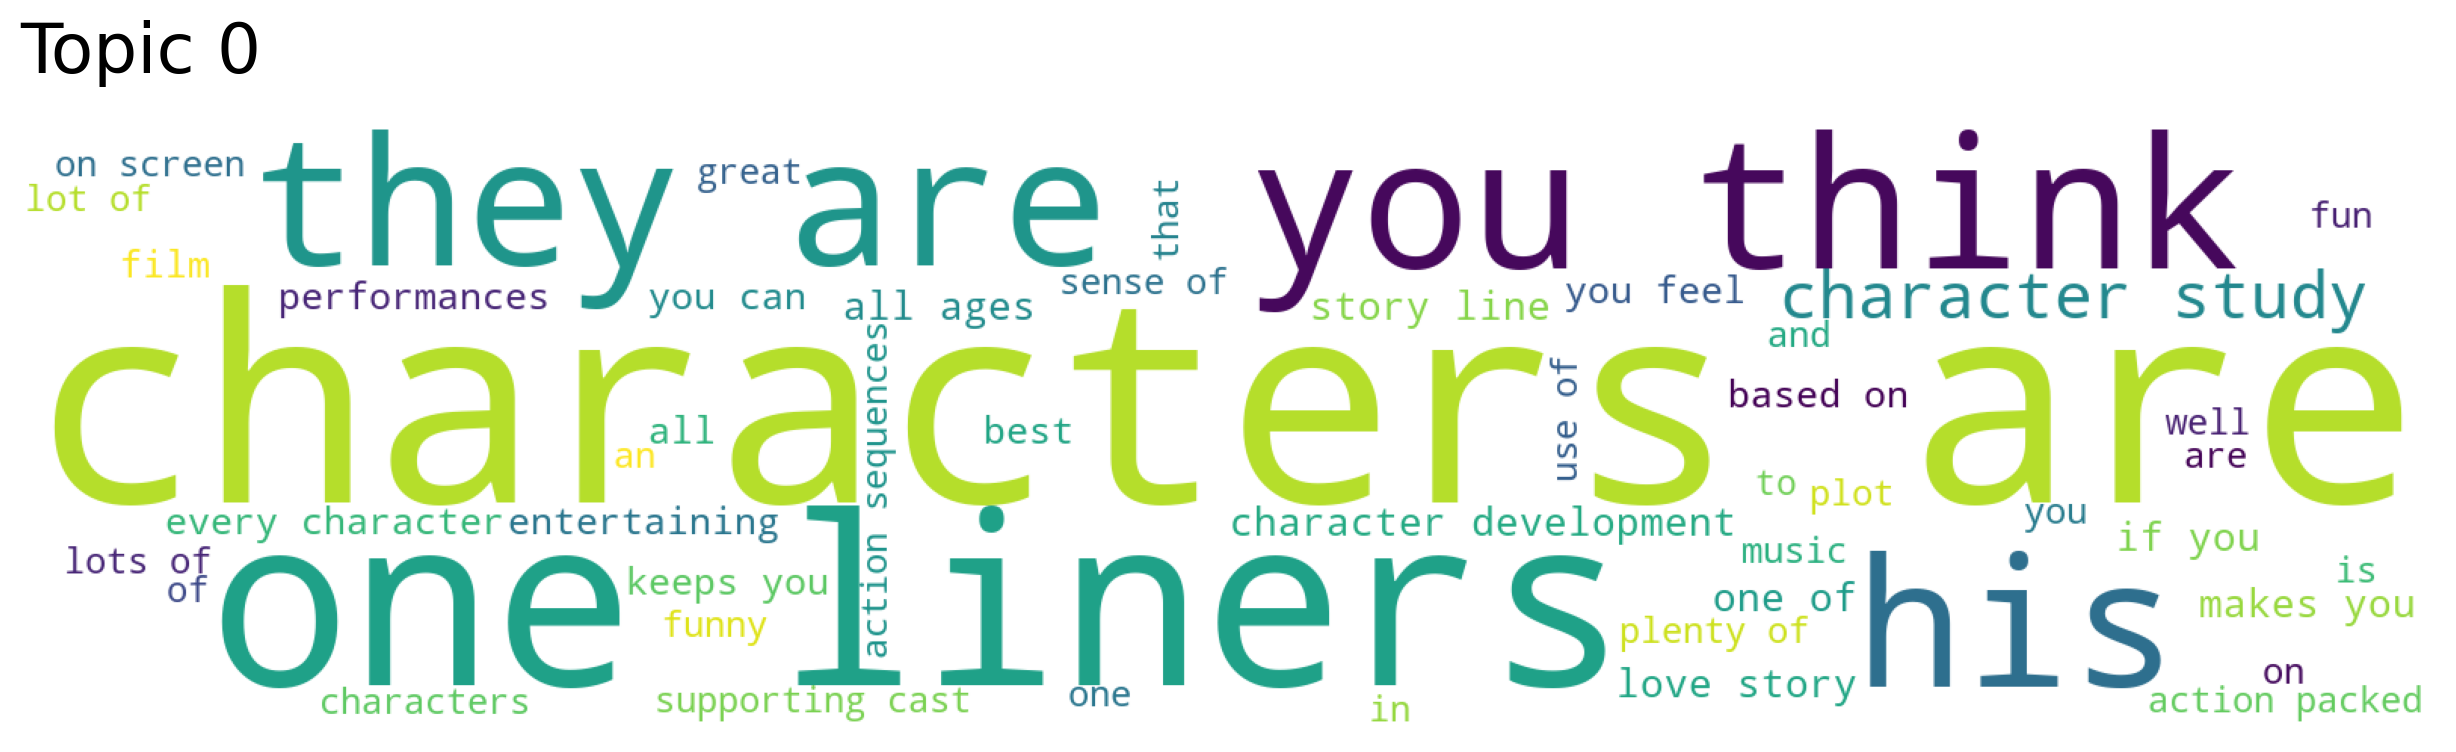

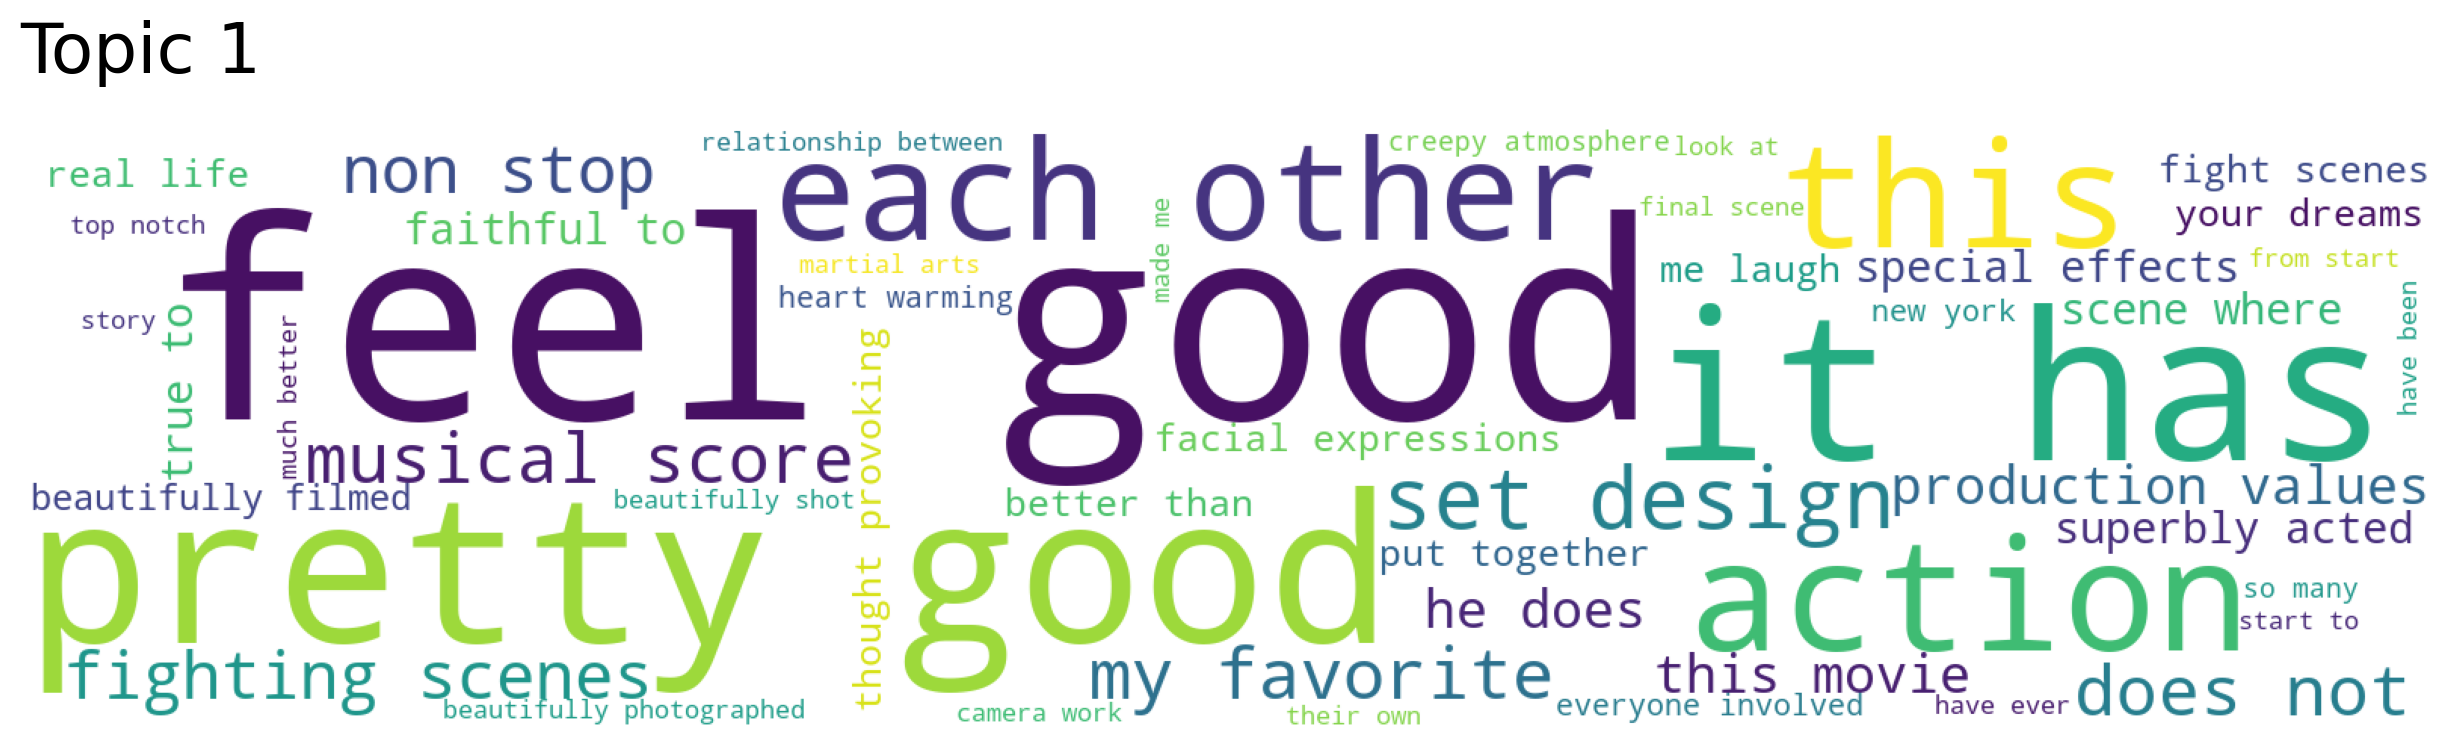

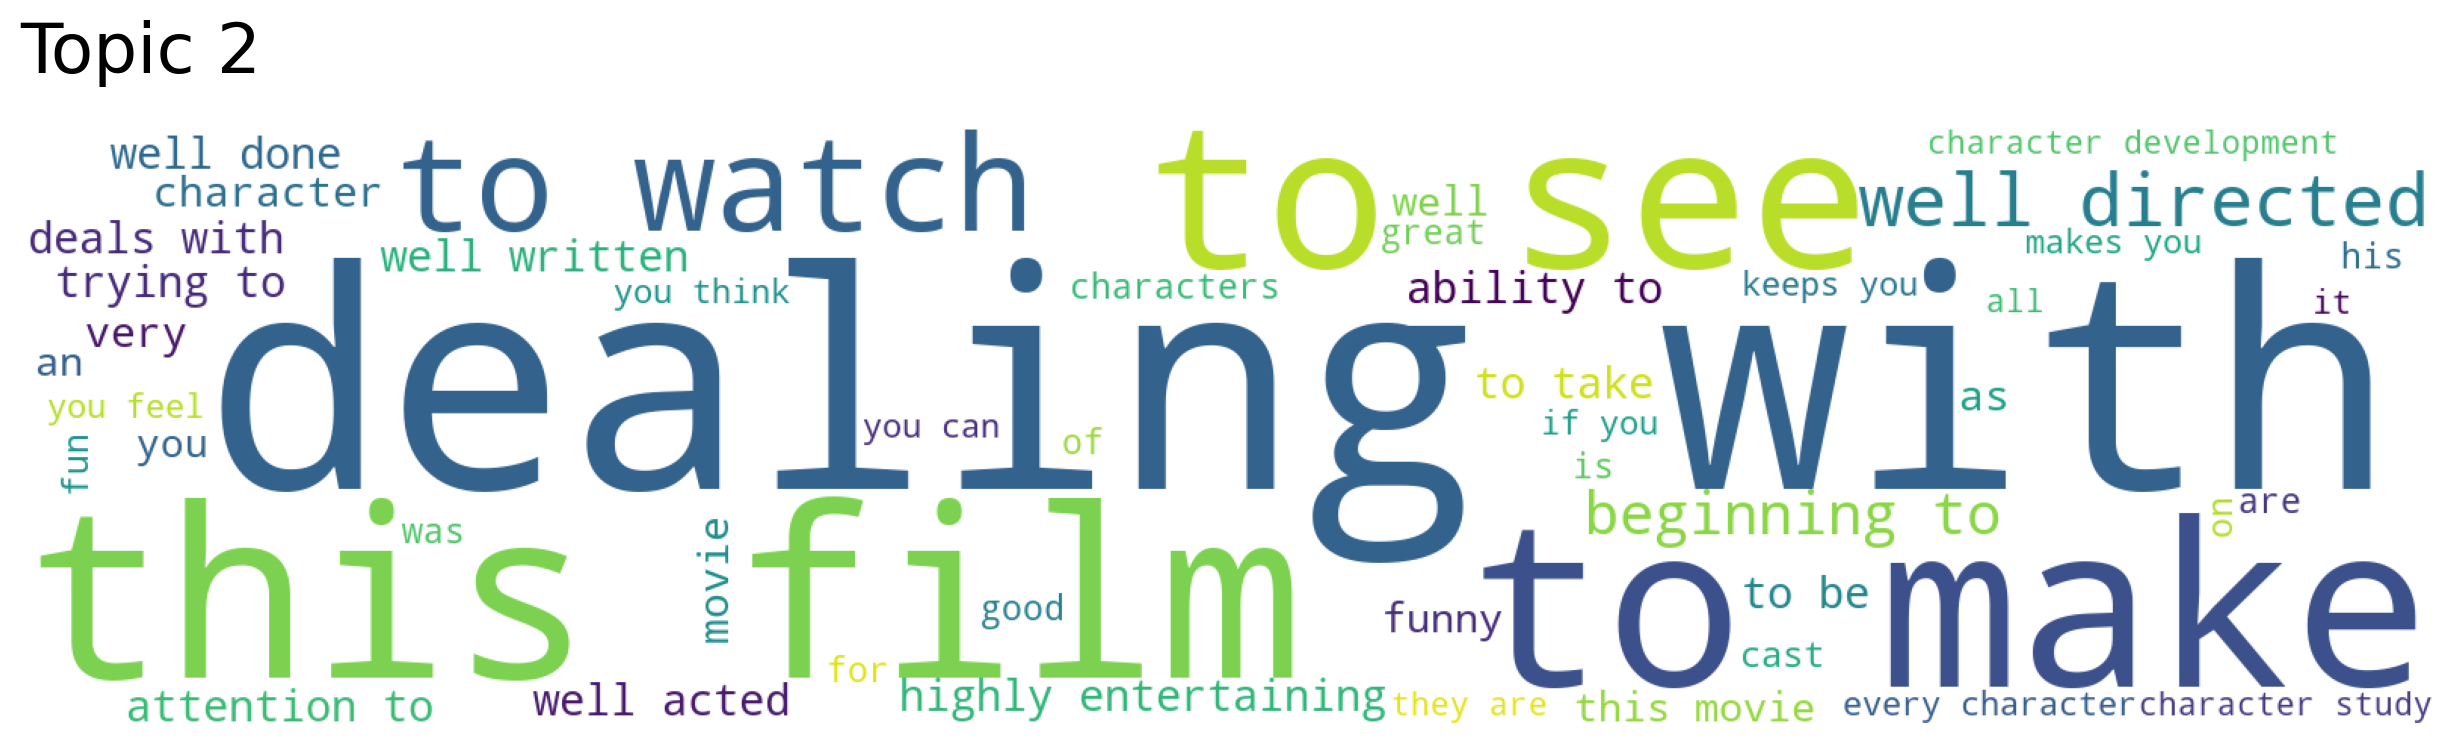

In [47]:
for topic in range(3):
    positive_model.generate_topic_wordcloud(topic, background_color='white', reduced=True)

## Pre-processing, Embedding, Dimensionality Reduction, Clustering, and Topic Representations of Negative Reviews

In [29]:
negative = pd.read_csv("results/negative_answers.csv")
negative.drop(negative[negative.score < 0.1].index, inplace=True)
positive.shape[0]

7226

In [31]:
from top2vec import Top2Vec
negative_model = Top2Vec(documents=negative.answer.to_list(),
                min_count=100,
                speed="deep-learn",
                ngram_vocab=True,
                workers=12)

2022-10-29 12:48:52,851 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-10-29 12:48:52,956 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-10-29 12:51:22,102 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-10-29 12:51:40,327 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-10-29 12:51:40,498 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [32]:
negative_model.get_num_topics()

5

In [48]:
negative_model.hierarchical_topic_reduction(3)

[[0], [3, 4, 1], [2]]

In [49]:
topic_words, word_scores, topic_nums = negative_model.get_topics(5)
for words, scores, num in zip(topic_words, word_scores, topic_nums):
  print(num)
  print(f"Words: {words[:20]}")

0
Words: ['the' 'in' 'movie has' 'no' 'acting' 'this film' 'to be' 'bad' 'no sense'
 'this' 'of' 'was' 'to watch' 'horrible' 'terrible' 'no real' 'movie'
 'film' 'and' 'story line']
1
Words: ['characters are' 'it wasn' 'so much' 'so' 'when he' 'just plain' 'boring'
 'action scenes' 'have been' 'low budget' 'special effects'
 'everything about' 'character development' 'at all' 'fight scenes'
 'hard to' 'going on' 'poorly acted' 'main character' 'ever seen']
2
Words: ['characters are' 'main characters' 'are' 'characters were' 'not funny'
 'does not' 'not even' 'not' 'god awful' 'lots of' 'lot of' 'fight scenes'
 'you can' 'so much' 'movie' 'it wasn' 'waste of' 'boring'
 'main character' 'poor']
3
Words: ['it' 'so' 'characters' 'plot' 'with' 'no real' 'no sense' 'this film'
 'no redeeming' 'this' 'terrible' 'to' 'was' 'of' 'worse than' 'to be'
 'acting' 'to watch' 'story' 'has no']
4
Words: ['way too' 'everything about' 'badly acted' 'it wasn' 'so much'
 'camera work' 'look like' 'so' 'po

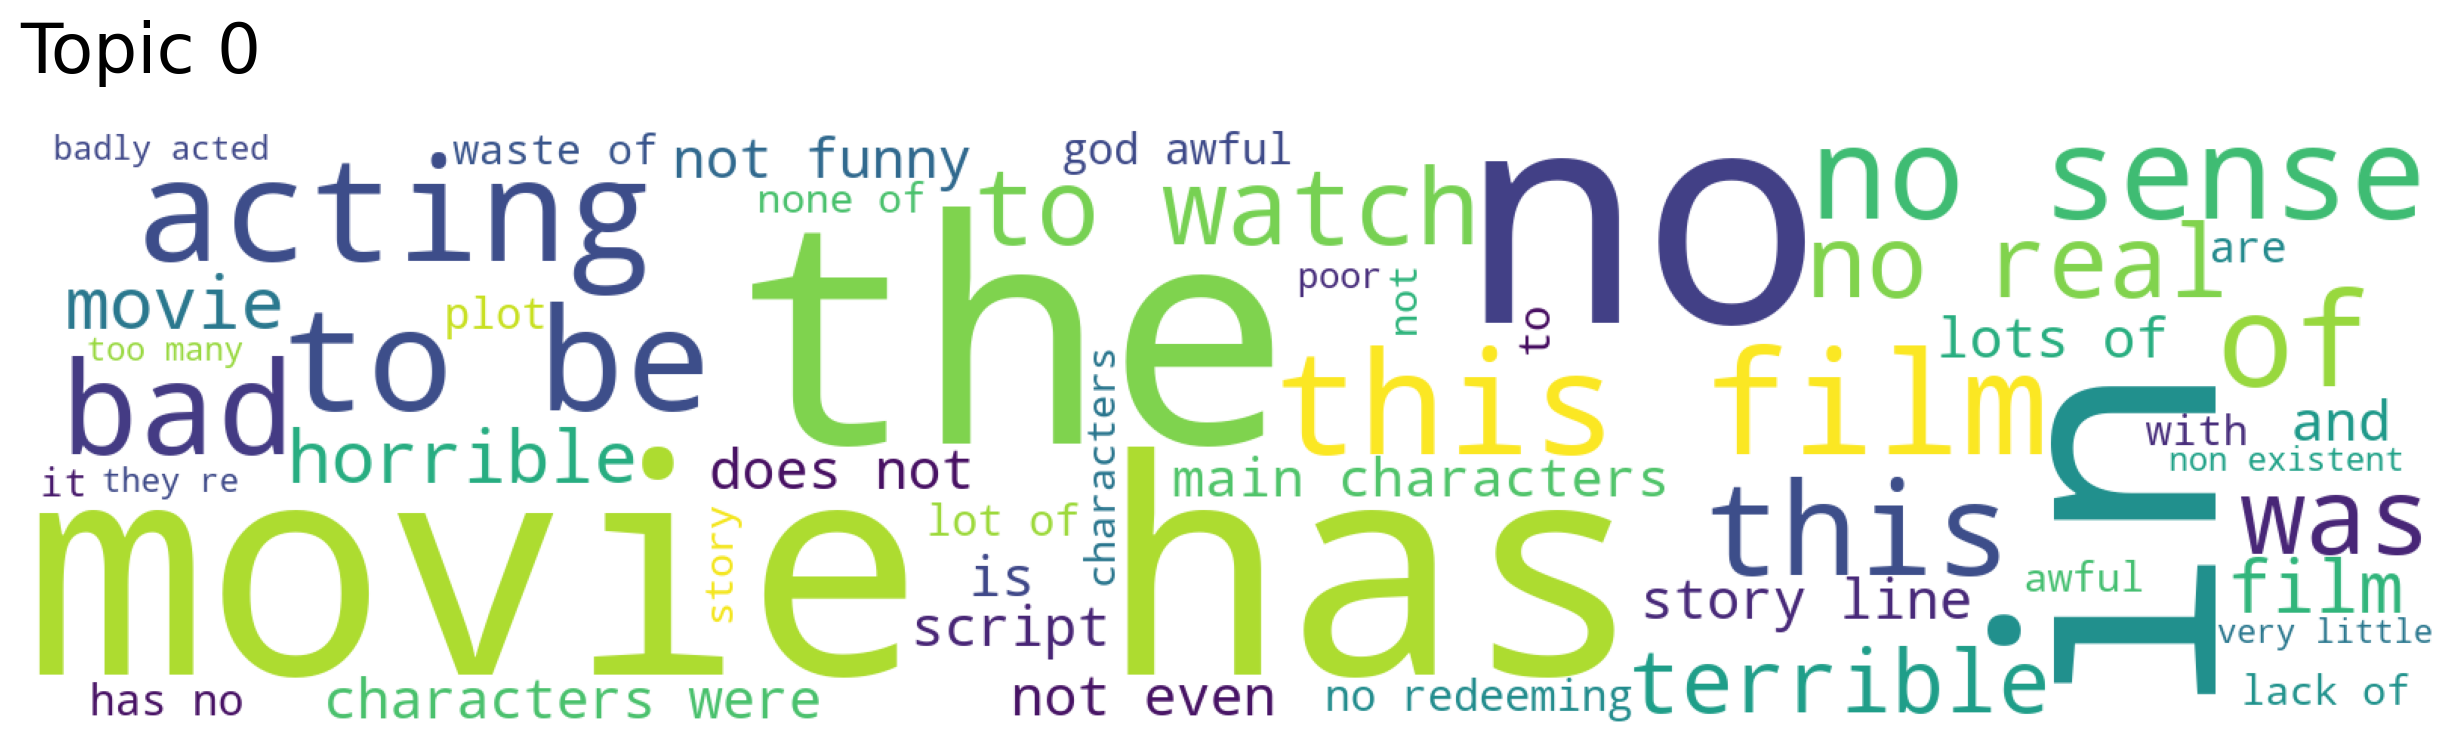

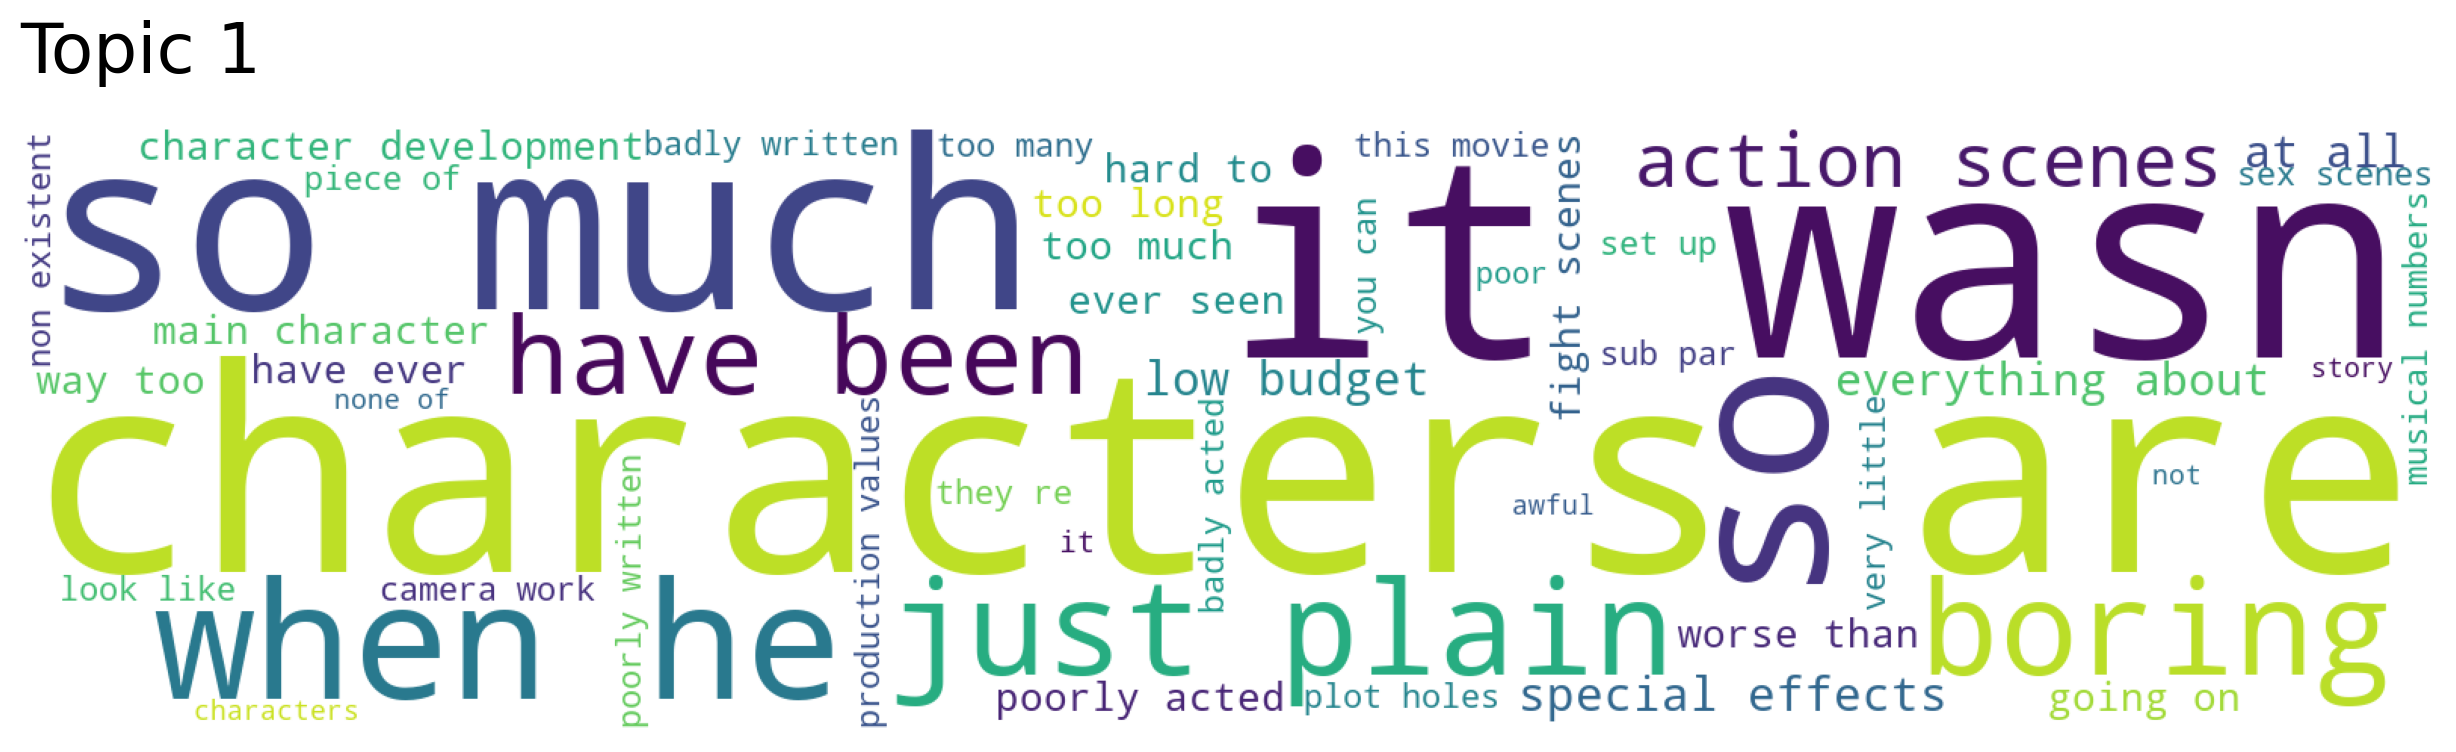

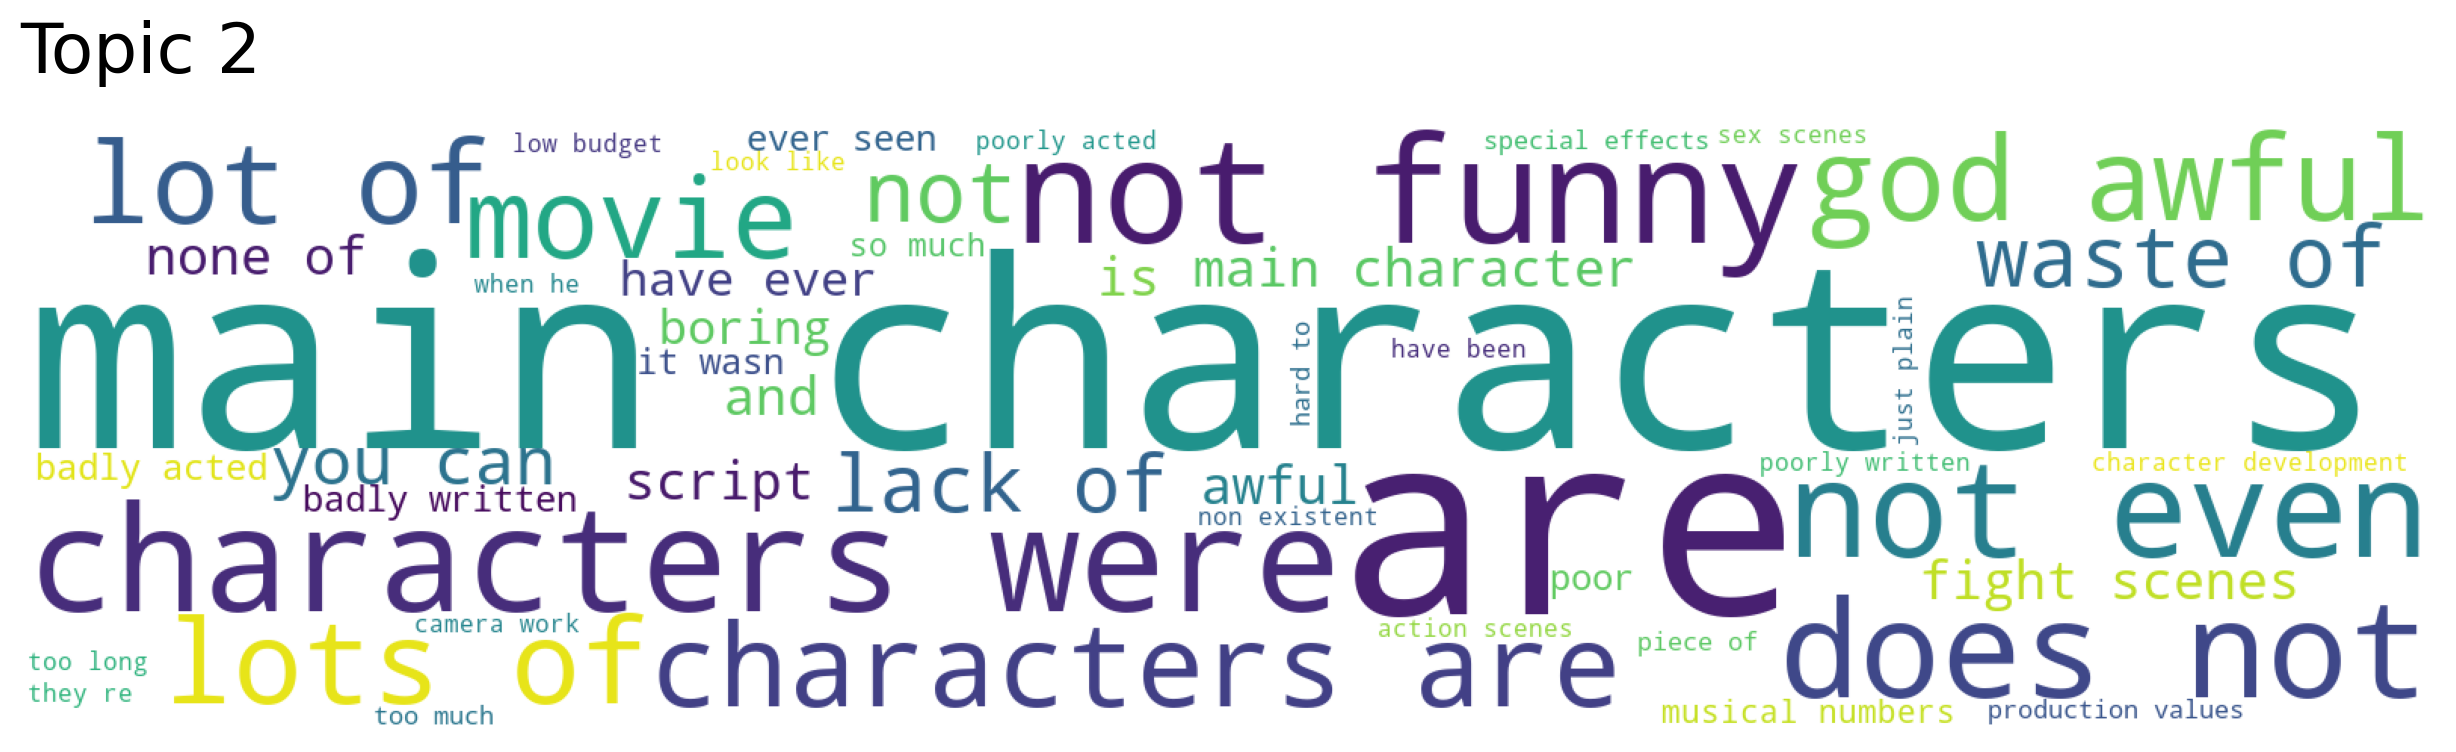

In [50]:
for topic in range(3):
    negative_model.generate_topic_wordcloud(topic, background_color='white', reduced=True)